#Propagación de la afinidad

In [85]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [86]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.5, random_state = 0)

In [87]:
import matplotlib.pyplot as plt
from itertools import cycle

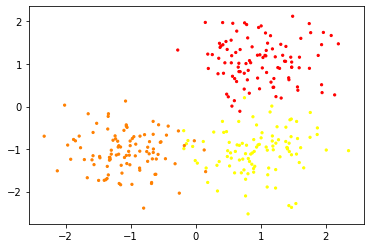

In [88]:
plt.scatter(X[:, 0], X[:,1], c = labels, cmap = 'autumn', s = 5)

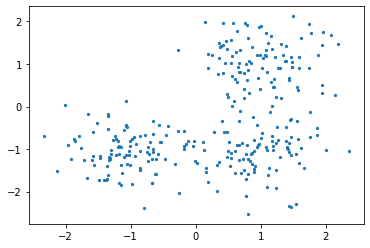

In [89]:
plt.scatter(X[:, 0], X[:,1], cmap = 'autumn', s = 5)

In [90]:
af = AffinityPropagation(preference = -50).fit(X)

In [91]:
cluster_center_ids = af.cluster_centers_indices_
cluster_center_ids

array([160, 250, 272])

In [92]:
n_clusters = len(cluter_center_ids)
n_clusters

3

In [93]:
def report_affinity_propagation(X, labels):

  from sklearn.cluster import AffinityPropagation
  from sklearn import metrics
  import matplotlib.pyplot as plt
  from itertools import cycle

  af = AffinityPropagation(preference = -50).fit(X)

  cluster_center_ids = af.cluster_centers_indices_
  cluster_labels = af.labels_
  n_clusters = len(cluter_center_ids)

  print('Número estimado de clusters: %d' % n_clusters)
  print('Homogeneidad: %0.3f' % metrics.homogeneity_score(labels, cluster_labels))
  print('Completitud: %0.3f' % metrics.completeness_score(labels, cluster_labels))
  print('V-Measure: %0.3f' % metrics.v_measure_score(labels, cluster_labels))
  print('R2 ajustado: %0.3f' % metrics.adjusted_rand_score(labels, cluster_labels))
  print('Información mutua ajustada: %0.3f' % metrics.adjusted_mutual_info_score(labels, cluster_labels))
  print('Coeficiente de la silueta: %0.3f' % metrics.silhouette_score(X, labels, metric = 'sqeuclidean'))

  plt.figure(figsize=(16,9))
  plt.clf()

  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
  for k, color in zip(range(n_clusters), colors):
    cluster_members = (cluster_labels == k)
    cluster_center = X[cluster_center_ids[k]]
    plt.plot(X[cluster_members, 0], X[cluster_members, 1], color + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = color, markeredgecolor = 'k', markersize = 14)
    for x in X[cluster_members]:
      plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], color)

  plt.title('Número estimado de clusters %d' % n_clusters)
  plt.show()

Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-Measure: 0.872
R2 ajustado: 0.912
Información mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


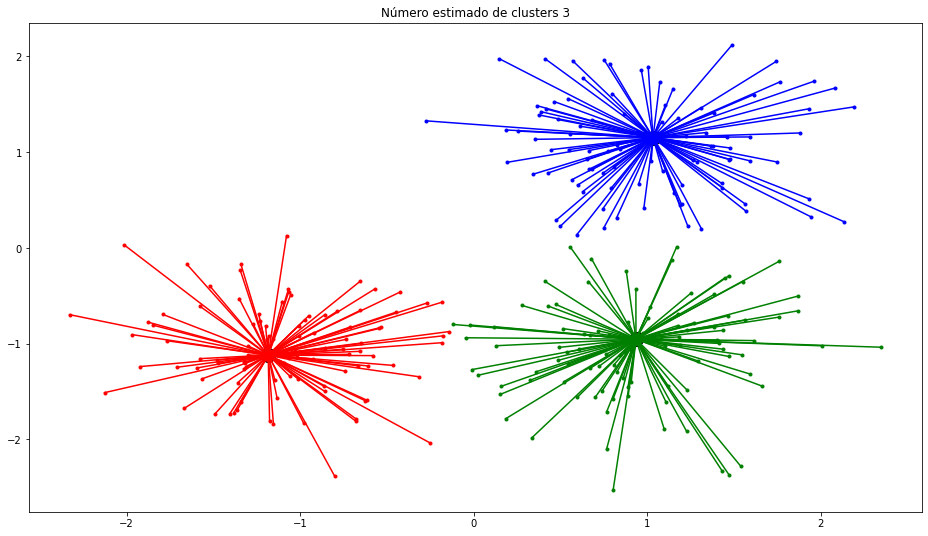

In [94]:
report_affinity_propagation(X, labels)